<a href="https://www.kaggle.com/code/nikitha0518/pneumonia-prediction-using-keras-cnn?scriptVersionId=108578149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The purpose of this project is to see how accurate of a Neural Network we can create to classify X-Ray scans from patients with pneumonia. 

**Importing the required libraries****

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../input"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['chest-xray-pneumonia']


# Our data is located in three folders:

1. train= contains the training data/images for teaching our model.
2. val= contains images which we will use to validate our model. The purpose of this data set is to prevent our model from Overfitting. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.
3. test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

In [2]:
train_folder= '../input/chest-xray-pneumonia/chest_xray/train/'
val_folder = '../input/chest_xray/chest_xray/chest_xray/val/'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test/'

# Let's set up the training and testing folders.

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-1365-0001.jpeg
pneumonia picture title: person1731_bacteria_4563.jpeg


Text(0.5, 1.0, 'Pneumonia')

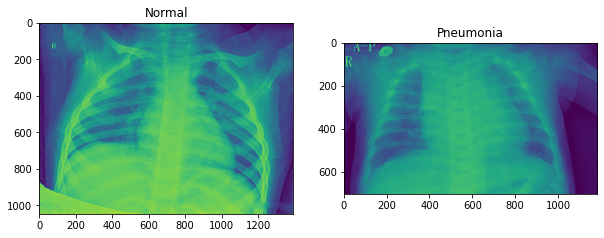

In [4]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Convolutional Neural Networks are easy to build and run because of the deep learning libraries such as Keras

* Keras is a high level deep learning library.
* It runs on top of more low level libraries such as Tensorflow which is why you will usually see that message. 'Using TensorFlow backend.' display when you call Keras.
* I am going to build a CNN that has 2 Convolution layers. After each convolution, I will add a Pooling layer using max-pooling.
* After the second convolutional layer, we will add 2 Fully Connected layers which will take out feature map of an image and make predictions about it. The second FC
* has only 1 unit becuase it needs to predict if someone has pneumonia.
* When we compile this CNN, we will use the Adam optimization fuction which optimizes how fast our model learns the correct classification of the image. Optimization functions are far too complex for me to get into in this post.

In [5]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2022-10-19 17:34:31.344275: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Now, we are going to fit the model to our training dataset and we will keep out testing dataset seperate

In [6]:
num_of_test_samples = 600
batch_size = 32

In [7]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**#Summary**

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [9]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

2022-10-19 17:34:35.571460: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


163/163 [==============================] - 111s 675ms/step - loss: 0.3698 - accuracy: 0.8391 - val_loss: 0.3524 - val_accuracy: 0.8125


In [10]:
test_accu = cnn.evaluate(test_set,steps=624)

624/624 [==============================] - 11s 16ms/step - loss: 0.3440 - accuracy: 0.8478


In [11]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 84.77563858032227 %


In [12]:
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
# confusion_matrix(validation_generator.classes, y_pred)

In [13]:
max(y_pred)

0

# Now, let's see how accuracy changed over our training and Validation Set and also how our Loss function changed!!

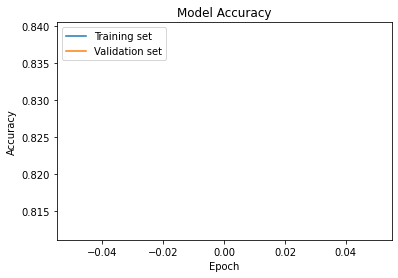

In [14]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

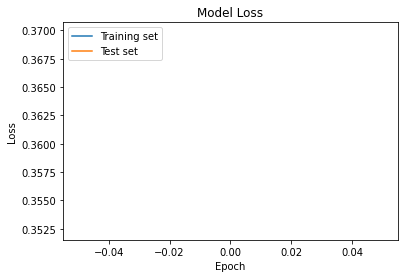

In [15]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

The world of medical imaging is ripe for a revolution in terms of deploying CNN based technologies. These are two things that AI technologies are great at.
